In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [42]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

In [ ]:
os.listdir('data_train')

In [29]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
data = 'data_train'

In [10]:
os.listdir(data)

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

The following code is not necessary because the data set is consistent with the phot sizes and extensions

In [32]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)


In [11]:
train_data = tf.keras.utils.image_dataset_from_directory('data_train', batch_size = 64)
validation_data = tf.keras.utils.image_dataset_from_directory("data_train")
class_names = train_data.class_names

Found 87000 files belonging to 29 classes.
Found 87000 files belonging to 29 classes.


In [12]:
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

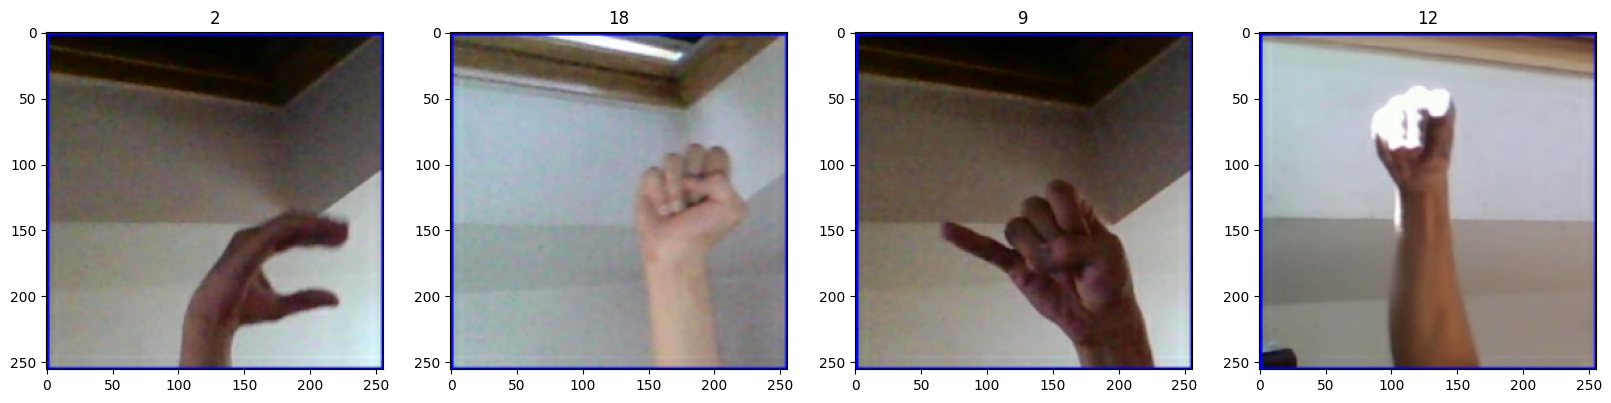

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

SCALE DATA  

In [14]:
train_data = train_data.map(lambda x,y: (x/255, y))
validation_data = validation_data.map(lambda x,y: (x/255, y))

In [15]:
data_iterator = train_data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
len(batch[0][1])

256

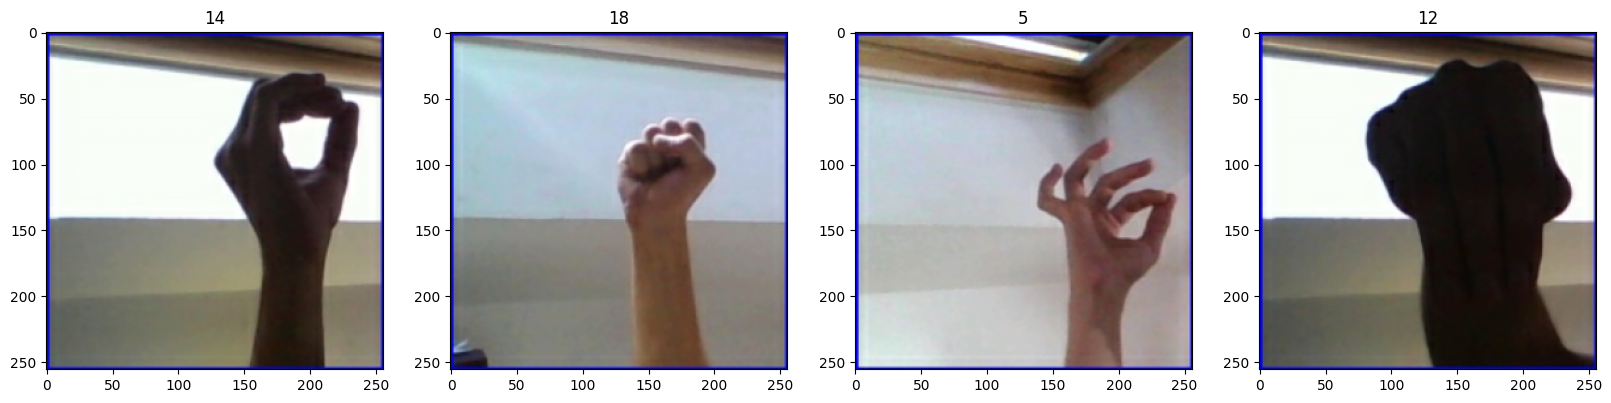

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

SPLIT DATA

In [19]:
training_size = int(len(train_data)*.7) + 1
validation_size = int(len(train_data)*.2)
testing_size = int(len(train_data)*.1)

In [20]:
train = train_data.take(training_size)
validation = train_data.skip(training_size).take(validation_size)
test = train_data.skip(training_size + validation_size).take(testing_size)

DEEP LEARNING MODEL

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [59]:
model = Sequential([
  layers.Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3), use_bias =True),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), 1, activation='relu', use_bias =True),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), 1, activation='relu', use_bias =True),
  layers.MaxPooling2D(),
  layers.Conv2D(256, (3,3), 1, activation='relu', use_bias =True),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu', use_bias =True),
  layers.Dropout(0.2),
  layers.Dense(29, use_bias =True)
])

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
#model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [62]:
epochs=15
history = model.fit(
  train,
  validation_data=validation,
  epochs=epochs
)

Epoch 1/15
952/952 [==============================] - 3045s 3s/step - loss: 1.0028 - accuracy: 0.6936 - val_loss: 0.1531 - val_accuracy: 0.9611
Epoch 2/15
952/952 [==============================] - 2910s 3s/step - loss: 0.1413 - accuracy: 0.9523 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 3/15
952/952 [==============================] - 2943s 3s/step - loss: 0.0855 - accuracy: 0.9713 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 4/15
952/952 [==============================] - 2909s 3s/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 5/15
952/952 [==============================] - 2963s 3s/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0725 - val_accuracy: 0.9766
Epoch 6/15
952/952 [==============================] - 2910s 3s/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0190 - val_accuracy: 0.9939
Epoch 7/15
952/952 [==============================] - 2992s 3s/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0130 - val_accuracy:

In [103]:
print(history.history)


[0.6935891509056091, 0.9522879719734192, 0.9713432192802429, 0.9798614978790283, 0.9831768870353699, 0.9861147403717041, 0.9873949289321899, 0.9901522994041443, 0.9915966391563416, 0.9921711087226868, 0.9928932785987854, 0.9934676885604858, 0.993697464466095, 0.9943375587463379, 0.9946658611297607]


In [99]:
%store history

Stored 'history' (History)


In [24]:
%store -r

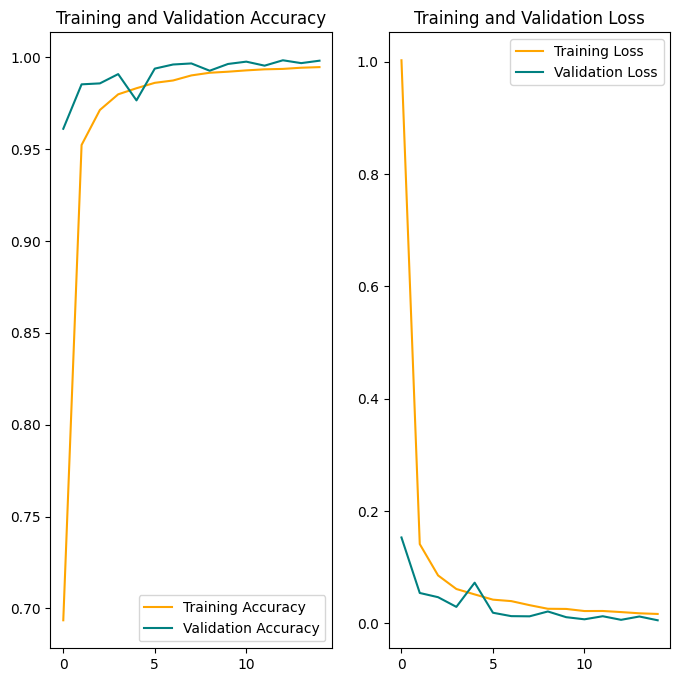

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 15
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot( acc, color='orange', label='Training Accuracy')
plt.plot( val_acc, color='teal', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, color='orange', label='Training Loss')
plt.plot(val_loss, color='teal', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

PERFORMANCE EVALUATION

In [81]:
pre = Precision()
re = Recall()
#acc = BinaryAccuracy()

In [98]:
for batch in test.as_numpy_iterator():
    X, y = batch

In [ ]:
prediction = model.predict(X)
pre.update_state(y, prediction)
re.update_state(y, prediction)
acc.update_state(y, prediction)


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    pre.update_state(y, prediction)
    re.update_state(y, prediction)
    acc.update_state(y, prediction)

In [ ]:
for batch in validation.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    #pre.update_state(y, prediction)
    #re.update_state(y, prediction)
    #acc.update_state(y, prediction)

In [88]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


TEST

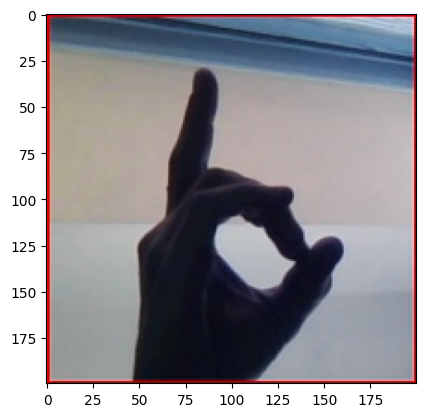

In [27]:
img = cv2.imread('D_test.jpg')
plt.imshow(img)
plt.show()

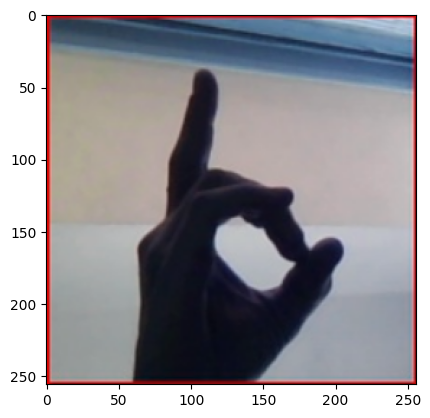

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 122ms/step


In [31]:
yhat.max()

21.81751

In [30]:
yhat

array([[-16.071537 ,  -7.3915744,  -2.6316504,  21.81751  , -11.687545 ,
         10.977898 ,  -6.73385  , -29.006124 ,  -2.4770365, -25.324354 ,
        -11.532257 ,  -3.286406 , -39.258606 , -30.551138 ,  12.610041 ,
        -10.856169 , -20.90182  , -18.789936 , -35.819527 , -22.319052 ,
        -31.59078  ,  -5.195717 ,  -9.783711 , -11.548418 , -17.073517 ,
        -15.977763 , -14.657035 , -38.069584 , -16.576414 ]],
      dtype=float32)

In [32]:
x = np.where(yhat==yhat.max())

x[1][0]

3

GRAPHS

In [123]:
pip install mlxtend


     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.4 MB 3.5 MB/s eta 0:00:01
     -------------------- ------------------- 0.7/1.4 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 10.7 MB/s eta 0:00:00
  Obtaining dependency information for scipy>=1.2.1 from https://files.pythonhosted.org/packages/04/b8/947f40706ee2e316fd1a191688f690c4c2b351c2d043fe9deb9b7940e36e/scipy-1.11.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ---------------------------------------- 59.1/59.1 kB ? eta 0:00:00
  Obtaining dependency information for pandas>=0.24.2 from https://files.pythonhosted.org/packages/9e/71/756a1be6bee0209d8c0d8c5e3b9fc72c00373f384a4017095ec404aec3ad/pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn>=1.0.2 from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image


In [140]:
test_loss, test_acc = model.evaluate(test)

136/136 [==============================] - 120s 717ms/step - loss: 0.0080 - accuracy: 0.9978


In [37]:
img = Image.open("W_test.jpg")
new_image = img.resize((256, 256))
img_array = tf.keras.utils.img_to_array(new_image)
img_array = tf.expand_dims(img_array/255, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 43ms/step
This image most likely belongs to W with a 100.00 percent confidence.


In [47]:
import os
sports = os.listdir('data_train/')
counter = 0;
hits = 0;
total = 0
y_true = []
y_hat = []

for sport in sports:
    new_path = 'data_train/'+sport;
    images = os.listdir('data_train/'+ sport)
    i = 0
    for image in images:
        image_path = new_path + '/' + image
        print(image_path)
        img = Image.open(image_path)
        new_image = img.resize((256, 256))
        img_array = tf.keras.utils.img_to_array(new_image)
        img_array = tf.expand_dims(img_array/255, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        y_true.append(class_names[counter])
        y_hat.append(class_names[np.argmax(score)])
        total +=1
        i+=1
    counter +=1
        


data_train/A/A1.jpg
1/1 [==============================] - 0s 81ms/step
data_train/A/A10.jpg
1/1 [==============================] - 0s 38ms/step
data_train/A/A100.jpg
1/1 [==============================] - 0s 37ms/step
data_train/A/A1000.jpg
1/1 [==============================] - 0s 40ms/step
data_train/A/A1001.jpg
1/1 [==============================] - 0s 36ms/step
data_train/A/A1002.jpg
1/1 [==============================] - 0s 45ms/step
data_train/A/A1003.jpg
1/1 [==============================] - 0s 37ms/step
data_train/A/A1004.jpg
1/1 [==============================] - 0s 32ms/step
data_train/A/A1005.jpg
1/1 [==============================] - 0s 32ms/step
data_train/A/A1006.jpg
1/1 [==============================] - 0s 33ms/step
data_train/A/A1007.jpg
1/1 [==============================] - 0s 32ms/step
data_train/A/A1008.jpg
1/1 [==============================] - 0s 32ms/step
data_train/A/A1009.jpg
1/1 [==============================] - 0s 34ms/step
data_train/A/A101.jpg
1/1 [====

c:\Users\itzel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:148: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)
c:\Users\itzel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:148: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)


ValueError: zero-size array to reduction operation maximum which has no identity

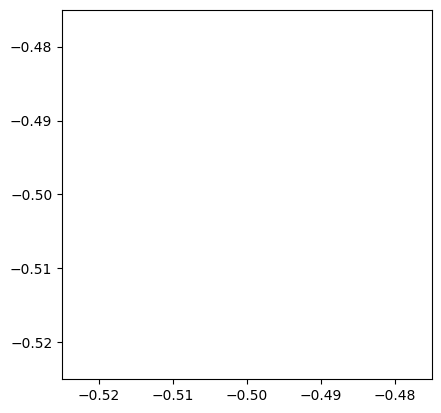

In [45]:
cm = confusion_matrix(y_true, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

SAVE MODEL

In [2]:
from tensorflow.keras.models import load_model


In [142]:
model.save(os.path.join('models','asl_imageclassifier.h5'))

c:\Users\itzel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
model = load_model(os.path.join('models','asl_imageclassifier.h5'))

In [ ]:
model.predict(np.expand_dims(resize/255, 0))